In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
data_folder = r"E:\data\gst-0610\MaxMin\partial_20"
g_performance_file = data_folder + r"\g_performance_across_K"
s_performance_file = data_folder + r"\s_performance_across_K"
t_performance_file = data_folder + r"\t_performance_across_K"

g_first_quantile_file = data_folder + r"\g_first_quantile_across_K"
s_first_quantile_file = data_folder + r"\s_first_quantile_across_K"
t_first_quantile_file = data_folder + r"\t_first_quantile_across_K"

g_last_quantile_file = data_folder + r"\g_last_quantile_across_K"
s_last_quantile_file = data_folder + r"\s_last_quantile_across_K"
t_last_quantile_file = data_folder + r"\t_last_quantile_across_K"

g_cog_performance_file = data_folder + r"\g_cog_performance_across_K_time"
s_cog_performance_file = data_folder + r"\s_cog_performance_across_K_time"
t_cog_performance_file = data_folder + r"\t_cog_performance_across_K_time"

g_variance_file = data_folder + r"\g_variance_across_K"
s_variance_file = data_folder + r"\s_variance_across_K"
t_variance_file = data_folder + r"\t_variance_across_K"

g_performance_time_file = data_folder + r"\g_performance_across_K_time"
s_performance_time_file = data_folder + r"\s_performance_across_K_time"
t_performance_time_file = data_folder + r"\t_performance_across_K_time"

with open(g_performance_file, 'rb') as infile:
    g_fitness = pickle.load(infile)
with open(s_performance_file, 'rb') as infile:
    s_fitness = pickle.load(infile)
with open(t_performance_file, 'rb') as infile:
    t_fitness = pickle.load(infile)

with open(g_first_quantile_file, 'rb') as infile:
    g_first = pickle.load(infile)
with open(s_first_quantile_file, 'rb') as infile:
    s_first = pickle.load(infile)
with open(t_first_quantile_file, 'rb') as infile:
    t_first = pickle.load(infile)

with open(g_last_quantile_file, 'rb') as infile:
    g_last = pickle.load(infile)
with open(s_last_quantile_file, 'rb') as infile:
    s_last = pickle.load(infile)
with open(t_last_quantile_file, 'rb') as infile:
    t_last = pickle.load(infile)

with open(g_cog_performance_file, 'rb') as infile:
    g_cog_fitness = pickle.load(infile)
with open(s_cog_performance_file, 'rb') as infile:
    s_cog_fitness = pickle.load(infile)
with open(t_performance_file, 'rb') as infile:
    t_cog_fitness = pickle.load(infile)

with open(g_variance_file, 'rb') as infile:
    g_variance = pickle.load(infile)
with open(s_variance_file, 'rb') as infile:
    s_variance = pickle.load(infile)
with open(t_variance_file, 'rb') as infile:
    t_variance = pickle.load(infile)

with open(g_performance_time_file, 'rb') as infile:
    g_performance_time = pickle.load(infile)
with open(s_performance_time_file, 'rb') as infile:
    s_performance_time = pickle.load(infile)
with open(t_performance_time_file, 'rb') as infile:
    t_performance_time = pickle.load(infile)
print(np.array(g_performance_time).shape)

(10, 300)


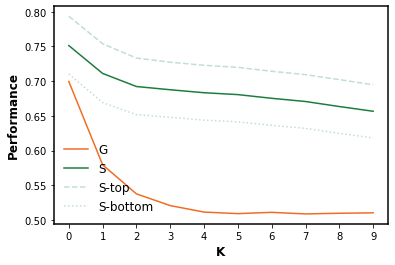

In [3]:
# GST Fitness
x = range(len(g_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_fitness, "k-", label="G", color=nature_orange)
# plt.plot(x, g_first, "k--", label="G-top", color=morandi_yellow)
# plt.plot(x, g_last, "k:", label="G-bottom", color=morandi_yellow)

plt.plot(x, s_fitness, "k-", label="S", color=nature_green)
plt.plot(x, s_first, "k--", label="S-top", color=shallow_green)
plt.plot(x, s_last, "k:", label="S-bottom", color=shallow_green)
# plt.plot(x, t_fitness, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GST_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

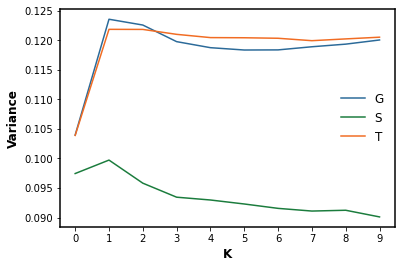

In [4]:
# GST Variance
x = range(len(g_variance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_variance, "k-", label="G", color=nature_blue)
plt.plot(x, s_variance, "k-", label="S", color=nature_green)
plt.plot(x, t_variance, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GST_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

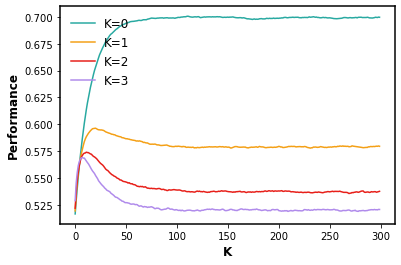

In [5]:
# Assess the time dimension
x = range(len(g_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, g_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, g_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, g_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\G_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

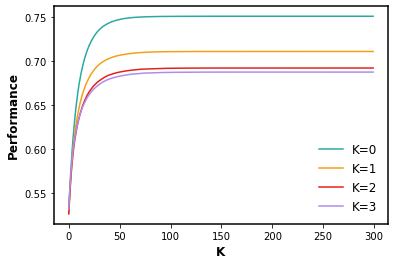

In [6]:
# Assess the time dimension
x = range(len(s_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, s_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, s_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, s_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, s_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\S_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

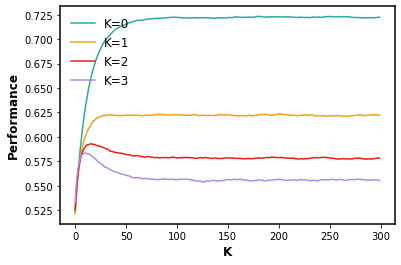

In [7]:
# Assess the time dimension
x = range(len(s_performance_time[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, t_performance_time[0], "k-", label="K=0", color=morandi_green)
plt.plot(x, t_performance_time[1], "k-", label="K=1", color=morandi_orange)
plt.plot(x, t_performance_time[2], "k-", label="K=2", color=morandi_red)
plt.plot(x, t_performance_time[3], "k-", label="K=3", color=morandi_purple)
plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\T_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()